In [1]:
import sqlite3
import pandas as pd
from timeit import default_timer as timer

#db_path = 'data/articles0.db'
db_path = 'data/plos_cb_abstracts1.db'

# connect to the database
db = sqlite3.connect(db_path)
print('database connected')

# cursor method
#cursor = db.cursor()
#cursor.execute("SELECT * FROM plos_cb_abstracts")

# since there are only ~4000 entries, just read directly into a pandas dataframe
df = pd.read_sql_query("select * from plos_cb_abstracts1;", db)
df



database connected


,id,url,authors,date,title,abstract,author_summary
0,None,https://doi.org/10.1371/journal.pcbi.1005973,"\n Runmin Wei, Jingy...","January 31, 2018",\nGSimp: A Gibbs sampler based left-censored m...,Left-censored missing values commonly exist in...,\nMissing values caused by the limit of detect...
1,None,https://doi.org/10.1371/journal.pcbi.1005931,"\n Krzysztof Bartoszek, ...","January 31, 2018",\nPredicting pathogenicity behavior in Escheri...,The Binary State Speciation and Extinction (Bi...,\nAn important challenge in Computational Biol...
2,None,https://doi.org/10.1371/journal.pcbi.1005953,"\n Yonathan Murin, J...","January 30, 2018",\nSozRank: A new approach for localizing the e...,Epilepsy is one of the most common neurologica...,\nEpilepsy is a common neurological disorder c...
3,None,https://doi.org/10.1371/journal.pcbi.1005949,"\n Francesco Alessandro Massucci,...","January 30, 2018",\nMetabolic plasticity in synthetic lethal mut...,The most frequent form of pairwise synthetic l...,"\nSynthetic lethality (SL), in which the combi..."
4,None,https://doi.org/10.1371/journal.pcbi.1005968,"\n Antonio Fabregat, ...","January 29, 2018",\nReactome graph database: Efficient access to...,"Reactome is a free, open-source, open-data, cu...","\nTo better support genome analysis, modeling,..."
5,None,https://doi.org/10.1371/journal.pcbi.1005951,"\n Alon Diament, Ann...","January 29, 2018",\nThe extent of ribosome queuing in budding ye...,Ribosome queuing is a fundamental phenomenon s...,"\nDuring translation, multiple ribosomes may t..."
6,None,https://doi.org/10.1371/journal.pcbi.1005943,"\n Rahila Rahimova, ...","January 29, 2018",\nIdentification of allosteric inhibitors of t...,The ecto-5’-nucleotidase CD73 plays an importa...,\nNucleotidases play a central role in maintai...
7,None,https://doi.org/10.1371/journal.pcbi.1005930,"\n Pablo Martínez-Cañada, ...","January 29, 2018",\nBiophysical network modeling of the dLGN cir...,Despite half-a-century of research since the s...,\nThe functional role of the dorsal lateral ge...
8,None,https://doi.org/10.1371/journal.pcbi.1005944,"\n Guillaume Marçais, ...","January 26, 2018",\nMUMmer4: A fast and versatile genome alignme...,The MUMmer system and the genome sequence alig...,No author summary found
9,None,https://doi.org/10.1371/journal.pcbi.1005952,"\n Koich Saeki, Akir...","January 25, 2018",\nThe role of spatial heterogeneity in the evo...,"Viruses have two modes spread in a host body, ...",\nViruses such as human immunodeficiency virus...


In [2]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string

def clean_text(paragraph):
    
    clean_words = []
    words = paragraph.split()
    
    for word in words:
        
        word = word.lower()
        
        # pick off any leading punctuation or trailing punctuation
        finished_checking_prefix = False
        while not(finished_checking_prefix):
            try:
                this_char = word[0]
                if this_char in string.punctuation:
                    word = word[1:] # snip leading punctuation
                else:
                    finished_checking_prefix = True
            except:
                # no more characters to check
                finished_checking_prefix = True
        
        finished_checking_postfix = False
        while not(finished_checking_postfix):
            try:
                this_char = word[-1]
                if this_char in string.punctuation:
                    word = word[:-1] # snip trailing punctuation
                else:
                    finished_checking_postfix = True
            except:
                # no more characters to check
                finished_checking_postfix = True
        
        # could split on slashes to handle this case: e.g. structure/function...but first need to check for url structure
        #word = " ".join(word.split('/'))
        
        clean_words.append(word)
   
    #text_only = re.sub("[^a-zA-Z]",           # The pattern to search for
    #                      " ",                   # The pattern to replace it with
    #                      paragraph )  # The text to search

    
    #lower_case = text_only.lower() 
    #words = lower_case.split()
         # optionally remove common words (using nltk "stopwords" list
    # exclusions = set(stopwords.words("english"))  # temporarily removing this since we will be doing inverse doc freq
    #words_filtered = [w for w in words if not w in exclusions]

    # todo perhaps use "Porter Stemming" to remove postfixes
    # or, better, use textblob Word lemmatize
    clean_paragraph = " ".join(clean_words)
    
    return clean_paragraph # return paragraph with words separated by spaces and no generic punctuation

In [3]:
# update dataframe with cleaned text

df['abstract_clean'] = ""
for idx,abstract in enumerate(df['abstract']):
    df['abstract_clean'].iloc[idx] = clean_text(abstract) # norm the text
    
df['author_summary_clean'] = ""
for idx,summary in enumerate(df['author_summary']):
    df['author_summary_clean'].iloc[idx] = clean_text(summary) # norm the text

df    


,id,url,authors,date,title,abstract,author_summary,abstract_clean,author_summary_clean
0,None,https://doi.org/10.1371/journal.pcbi.1005973,"\n Runmin Wei, Jingy...","January 31, 2018",\nGSimp: A Gibbs sampler based left-censored m...,Left-censored missing values commonly exist in...,\nMissing values caused by the limit of detect...,left-censored missing values commonly exist in...,missing values caused by the limit of detectio...
1,None,https://doi.org/10.1371/journal.pcbi.1005931,"\n Krzysztof Bartoszek, ...","January 31, 2018",\nPredicting pathogenicity behavior in Escheri...,The Binary State Speciation and Extinction (Bi...,\nAn important challenge in Computational Biol...,the binary state speciation and extinction bis...,an important challenge in computational biolog...
2,None,https://doi.org/10.1371/journal.pcbi.1005953,"\n Yonathan Murin, J...","January 30, 2018",\nSozRank: A new approach for localizing the e...,Epilepsy is one of the most common neurologica...,\nEpilepsy is a common neurological disorder c...,epilepsy is one of the most common neurologica...,epilepsy is a common neurological disorder cha...
3,None,https://doi.org/10.1371/journal.pcbi.1005949,"\n Francesco Alessandro Massucci,...","January 30, 2018",\nMetabolic plasticity in synthetic lethal mut...,The most frequent form of pairwise synthetic l...,"\nSynthetic lethality (SL), in which the combi...",the most frequent form of pairwise synthetic l...,synthetic lethality sl in which the combined k...
4,None,https://doi.org/10.1371/journal.pcbi.1005968,"\n Antonio Fabregat, ...","January 29, 2018",\nReactome graph database: Efficient access to...,"Reactome is a free, open-source, open-data, cu...","\nTo better support genome analysis, modeling,...",reactome is a free open-source open-data curat...,to better support genome analysis modeling sys...
5,None,https://doi.org/10.1371/journal.pcbi.1005951,"\n Alon Diament, Ann...","January 29, 2018",\nThe extent of ribosome queuing in budding ye...,Ribosome queuing is a fundamental phenomenon s...,"\nDuring translation, multiple ribosomes may t...",ribosome queuing is a fundamental phenomenon s...,during translation multiple ribosomes may tran...
6,None,https://doi.org/10.1371/journal.pcbi.1005943,"\n Rahila Rahimova, ...","January 29, 2018",\nIdentification of allosteric inhibitors of t...,The ecto-5’-nucleotidase CD73 plays an importa...,\nNucleotidases play a central role in maintai...,the ecto-5’-nucleotidase cd73 plays an importa...,nucleotidases play a central role in maintaini...
7,None,https://doi.org/10.1371/journal.pcbi.1005930,"\n Pablo Martínez-Cañada, ...","January 29, 2018",\nBiophysical network modeling of the dLGN cir...,Despite half-a-century of research since the s...,\nThe functional role of the dorsal lateral ge...,despite half-a-century of research since the s...,the functional role of the dorsal lateral geni...
8,None,https://doi.org/10.1371/journal.pcbi.1005944,"\n Guillaume Marçais, ...","January 26, 2018",\nMUMmer4: A fast and versatile genome alignme...,The MUMmer system and the genome sequence alig...,No author summary found,the mummer system and the genome sequence alig...,no author summary found
9,None,https://doi.org/10.1371/journal.pcbi.1005952,"\n Koich Saeki, Akir...","January 25, 2018",\nThe role of spatial heterogeneity in the evo...,"Viruses have two modes spread in a host body, ...",\nViruses such as human immunodeficiency virus...,viruses have two modes spread in a host body o...,viruses such as human immunodeficiency virus a...


In [4]:
from collections import defaultdict
import numpy as np

# todo generate word count
word_count = 0
dictionary = defaultdict(int)

# get all the words from the abstracts and author summaries
for idx,abstract in enumerate(df['abstract_clean']):
    author_summary = df['author_summary_clean'].iloc[idx]
    for word in abstract.split(' '):
        dictionary[word] += 1
    for word in author_summary.split(' '):
        dictionary[word] += 1

# get word statistics:

# number of words
numWords = np.sum(dictionary.values())
print(numWords)
# number of unique words
numUniqueWords = len(dictionary.keys())
print(numUniqueWords)

# snapshot of percentiles in the word frequency distribution
print(np.min(dictionary.values()))
print(np.percentile(dictionary.values(),25))
print(np.percentile(dictionary.values(),50))
print(np.percentile(dictionary.values(),75))
print(np.percentile(dictionary.values(),90))
print(np.percentile(dictionary.values(),95))
print(np.percentile(dictionary.values(),99))
print(np.max(dictionary.values()))

# histogram of word frequency
import matplotlib.pyplot as plt

plt.figure()
plt.hist(dictionary.values(), 100)
plt.title('historam of word occurrences is very long tailed')
plt.xlim([0, 100000])
plt.show()



2107091
49370
1
1.0
2.0
6.0
31.0
95.0
570.0
119026


In [5]:
# todo check for zipf


In [6]:
# todo tf-idf   (wordcount/numwords)*(log(NumDocs/NumAppearances))



In [7]:
# word embeddings with word2vec

print('generating sentences data structure...')
list_of_sentences = []
# generate the appropriate input format
for idx,abstract in enumerate(df['abstract_clean']):
    author_summary = df['author_summary_clean'].iloc[idx]
    list_of_sentences.append(abstract.split(' '))
    list_of_sentences.append(author_summary.split(' '))
print('sentences data structure generated')


generating sentences data structure...
sentences data structure generated


In [8]:
from timeit import default_timer as timer
start = timer()

from gensim.models import Word2Vec
DIM = 300;
model = Word2Vec(sentences=list_of_sentences, # tokenized senteces, list of list of strings
                 size=DIM,  # size of embedding vectors
                 workers=1, # how many threads?
                 min_count=20, # minimum frequency per token, filtering rare words
                 sample=0.05, # weight of downsampling common words
                 sg = 0, # should we use skip-gram? if 0, then cbow
                 iter=5,
                 hs = 0)

end = timer()
print("time elapsed: ")
print(end - start)


time elapsed: 
74.1841636307


In [9]:
# save a record for later (currently this isn't a convenient format though...would be nice to have a format that would 
# preserve the ability to write model[word] = embedding todo)

import json

print('writing embedding model...')
outfile_path = 'data/word_embedding_model.json'
save_object = {'vocab':model.vocab.keys(), 'embeddings':model[model.vocab].tolist()} 
with open(outfile_path,'w') as outfile:
    json.dump(save_object, outfile)
    
print('finished word embedding model to json file')

writing embedding model...
finished word embedding model to json file


(10542L,)
[[ 0.5273809  -0.35947418  0.7189884  ...  0.5679512   0.0147395
  -0.42087024]
 [ 0.20889351  0.09985566  0.04907968 ...  0.15374848 -0.05497721
   0.13356157]
 [-0.29549852 -0.7566168   0.7634989  ...  0.08113817  0.0874287
  -0.34757352]
 ...
 [ 0.07881097 -0.07486861  0.18605165 ...  0.16633129 -0.180555
  -0.31474525]
 [ 0.1904111  -0.0300419   0.02408521 ...  0.09729506 -0.32330397
  -0.02463181]
 [ 0.13943265 -0.05956625  0.02078911 ...  0.00841614 -0.17734063
  -0.00743285]]
(6456L, 300L)


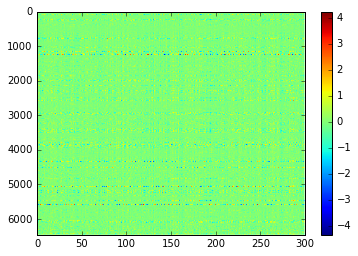

[(u'lab', 0.7590217590332031), (u'scenario', 0.7322572469711304), (u'case', 0.7273996472358704), (u'assay', 0.7254523634910583), (u'literature', 0.7211244106292725), (u'setting', 0.7156258821487427), (u'task', 0.7150332927703857), (u'situation', 0.7004925608634949), (u'fashion', 0.6960419416427612), (u'article', 0.6824431419372559)]
[(u'synapse', 0.7958077192306519), (u'filter', 0.6986734867095947), (u'stimulus', 0.6941931843757629), (u'spiking', 0.6893793344497681), (u'dendritic', 0.6891436576843262), (u'output', 0.6732656955718994), (u'regime', 0.668256402015686), (u'neurons', 0.6643671989440918), (u'population', 0.6502279043197632), (u'projection', 0.6473766565322876)]
[(u'feedforward', 0.822063148021698), (u'cortical', 0.7678166031837463), (u'spiking', 0.762726366519928), (u'feed-forward', 0.7287189960479736), (u'purely', 0.7205868363380432), (u'inhibitory', 0.7152374982833862), (u'neocortical', 0.7144277691841125), (u'dense', 0.7034193277359009), (u'balanced', 0.6967703104019165),

In [10]:
# test out the embedding model (sanity check)

X = model[model.vocab]
print(np.shape(list_of_sentences))
print(X)

print(np.shape(X))

plt.figure()
plt.imshow(X,interpolation='none')
plt.gca().set_aspect('auto')
plt.colorbar()
plt.show()

print(model.most_similar('experiment'))
print(model.most_similar('neuron'))
print(model.most_similar('recurrent'))
print(model.most_similar('machine'))

In [11]:
# construct the sum vectors for each blurb in embedding-space


abstract_embedding = np.zeros((df.shape[0],DIM)) # number of abstracts x dimensionality of the embedding
author_summary_embedding = np.zeros((df.shape[0],DIM))

for idx,abstract in enumerate(df['abstract_clean']):
    v = np.zeros((1,DIM))
    for word in abstract.split(' '):
        try: 
            word_embedding = model[word]
        except:
            word_embedding = np.zeros((1,DIM)) # rare words aren't in the model dictionary
        v = v + word_embedding
    abstract_embedding[idx,:] = v
    
for idx,summary in enumerate(df['author_summary_clean']):
    v = np.zeros((1,DIM))
    for word in summary.split(' '):
        try: 
            word_embedding = model[word]
        except:
            word_embedding = np.zeros((1,DIM)) # rare words aren't in the model dictionary
        v = v + word_embedding
    author_summary_embedding[idx,:] = v
    
print(np.shape(abstract_embedding))
print(np.shape(author_summary_embedding))



(5271L, 300L)
(5271L, 300L)


In [12]:
            
# measure their similarity    
from sklearn.metrics.pairwise import cosine_similarity


# full list of comparisons 
stacked_embeddings = np.vstack((abstract_embedding, author_summary_embedding))
print(np.shape(stacked_embeddings))
#W_similarity = cosine_similarity(stacked_embeddings)
#print(np.shape(W_similarity))

W_abs_abs = cosine_similarity(abstract_embedding) # from abstracts to abstracts
print(np.shape(W_abs_abs))

(10542L, 300L)
(5271L, 5271L)


In [13]:
# optionally could pre-process W_abs_abs to achieve a sparser network



In [14]:


import sqlite3

db = sqlite3.connect('data/plos_cb_abstracts_similarity12.db')
cursor = db.cursor()
cursor.execute('''CREATE TABLE plos_cb_abstracts_similarity12(id INTEGER PRIMARYKEY,
                    source TEXT, target TEXT, sourceID INT, targetID INT, weight INT)
                    ''')
db.commit()




for row_idx,row in enumerate(W_abs_abs):
    print(row_idx)
    edge_list = []
    for col_idx,similarity_entry in enumerate(W_abs_abs[row_idx]):
        pre_idx = row_idx # int(np.floor(row_idx / 2))
        post_idx = col_idx # int(np.floor(col_idx / 2))
        pre_title = 'abstract: ' + df['title'].iloc[pre_idx]
        post_title = 'abstract: ' + df['title'].iloc[post_idx]
        
        #print( pre_title, post_title, row_idx, col_idx)
        edge_entry = {"source":pre_title,"target":post_title,"sourceID":row_idx,
                          "targetID":col_idx,"weight":similarity_entry}
        edge_list.append(edge_entry)

    # add article data object to a database        
    cursor.executemany('''INSERT INTO plos_cb_abstracts_similarity12(source, target, sourceID, targetID, weight)
            VALUES(:source, :target, :sourceID, :targetID, :weight)''',
            [edge_entry for edge_entry in edge_list])

    db.commit()




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270


In [15]:
# note: the following 2 cells pertaining to JSON saving are deprecated
# trying a proper database in the hope of reading/writing more quickly

# wait but sometimes writing the similarity amtrix is fast and sometimes it takes forever
# is it just dependent on whether it fits in ram?

In [16]:


#plt.figure()
#plt.imshow(W_similarity, interpolation='none', aspect='auto')
#plt.title('similarity matrix')
#plt.show()

import json



print('writing similarity matrix...')
start = timer()

outfile_path = 'data/similarity_matrix.json'
save_object = {'W_abs_abs':W_abs_abs.tolist()} # todo include model params here
with open(outfile_path,'w') as outfile:
    json.dump(save_object, outfile)
    
    
NUM_TEXTS = len(df['title']) * 2 # number of articles times two text per article

print('finished writing similarity matrix to json file')

end = timer()
print("time elapsed: ")
print(end - start)

#plt.figure()
#plt.hist(W_similarity.reshape(NUM_TEXTS*NUM_TEXTS),100)
#plt.show()
    

writing similarity matrix...
finished writing similarity matrix to json file
time elapsed: 
160.07469875


In [17]:
# make a json version of the network

edge_list = []

for row_idx,row in enumerate(W_similarity):
    for col_idx,similarity_entry in enumerate(W_similarity[row_idx]):
        pre_idx = int(np.floor(row_idx / 2))
        post_idx = int(np.floor(col_idx / 2))
        if row_idx % 2 == 0:
            pre_title = 'abstract: ' + df['title'].iloc[pre_idx]
        else:
            pre_title = 'summary: ' + df['title'].iloc[pre_idx]
        
        if col_idx % 2 == 0:
            post_title = 'abstract: ' + df['title'].iloc[post_idx]
        else:
            post_title = 'summary: ' + df['title'].iloc[post_idx]
            
        #print( pre_title, post_title, row_idx, col_idx)
        edge_entry = {"source":pre_title,"target":post_title,"weight":similarity_entry}
        edge_list.append(edge_entry)
            
print(edge_list[0])
# todo generate edge lists for abstracts only, author summaries only        
        
import json

print('writing edge list...')
outfile_path = 'data/edge_list.json'
save_object = {'edge_list':edge_list} # todo include model params here
with open(outfile_path,'w') as outfile:
    json.dump(save_object, outfile)
    
print('finished writing edge list to json file')
      

'''
note for reading large json files:

There was a duplicate to this question that had a better answer. See https://stackoverflow.com/a/10382359/1623645, which suggests ijson.

Update:

I tried it out, and ijson is to JSON what SAX is to XML. For instance, you can do this:

import ijson
for prefix, the_type, value in ijson.parse(open(json_file_name)):
    print prefix, the_type, value

where prefix is a dot-separated index in the JSON tree (what happens if your key names have dots in them? I guess that would be bad for Javascript, too...), theType describes a SAX-like event, one of 'null', 'boolean', 'number', 'string', 'map_key', 'start_map', 'end_map', 'start_array', 'end_array', and value is the value of the object or None if the_type is an event like starting/ending a map/array.

The project has some docstrings, but not enough global documentation. I had to dig into ijson/common.py to find what I was looking for.


'''


NameError: name 'W_similarity' is not defined

In [ ]:
# todo do a flow visualization



In [ ]:
# todo research questions:

# compare author summary vs abstract

# compare content over time

# cluster content

# NOTE this is the key file for this analysis. todo documentation